<a href="https://colab.research.google.com/github/chandrika1004/PRODIGY_DS_02/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prodigy Infotech Datascience Task 2

#TASK: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Expolre the relationship between variables and identify patterns and trends in the data.

##Importing the necessary libraries

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Loading the dataset

In [28]:
netflix=pd.read_csv('netflix_titles.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [29]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [30]:
print(netflix.shape)
print(netflix.columns)

(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


#DATA CLEANING

##Check missing values

In [31]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


##Treating missing values

In [32]:
netflix['director'].fillna('Unknown',inplace=True)
netflix['country'].fillna('Not mentioned',inplace=True)
netflix.dropna(subset=['cast','date_added','rating','duration'],inplace=True)

##Final check after cleaning

In [33]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


#EXPLORATORY DATA ANALYSIS (EDA)

##Movies vs TV Shows

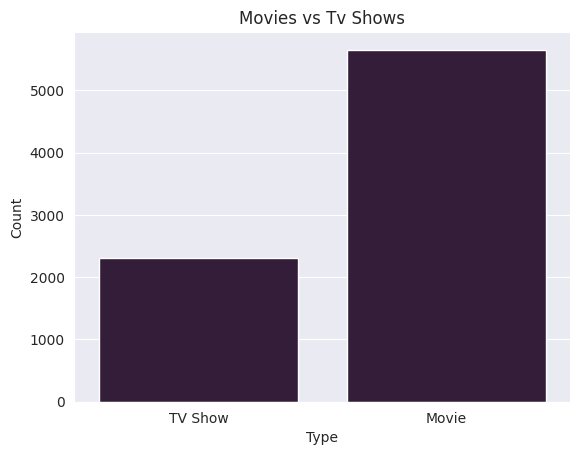

In [34]:
sns.countplot(x='type',data=netflix)
sns.set_style('darkgrid')
sns.set_palette('cividis')
plt.title('Movies vs Tv Shows')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()

##Visualizing Distribution of Duration using Hist plot

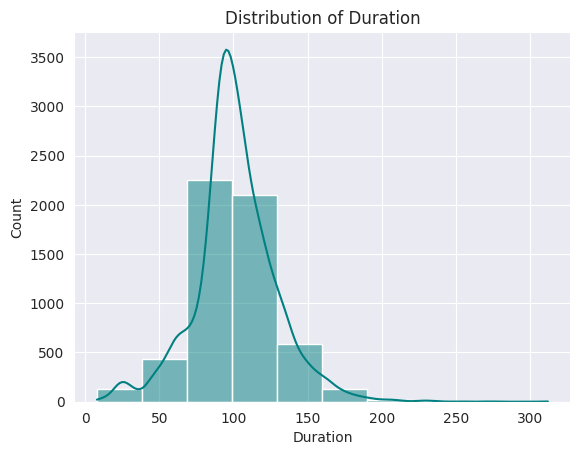

In [35]:
movies_df = netflix[netflix['type'] == 'Movie'].copy()
movies_df.loc[:,'duration_mins'] = movies_df['duration'].str.replace('min','').astype(float)
sns.histplot(movies_df['duration_mins'],bins=10,kde=True,color='teal')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Distribution of Duration')
plt.show()

##Visualizing Top 10 Years with Most Movie Releases on Netflix using Pie plot

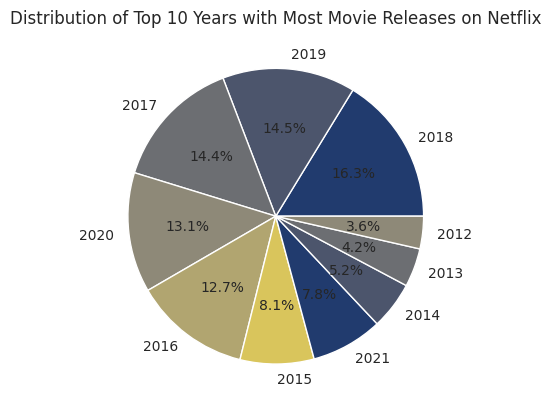

In [36]:
movies_per_year=netflix['release_year'].value_counts().sort_values(ascending=False).head(10)
plt.pie(movies_per_year,labels=movies_per_year.index,autopct='%1.1f%%')
colors=sns.color_palette('coolwarm')
plt.title('Distribution of Top 10 Years with Most Movie Releases on Netflix')
plt.show()

##Release Year vs Duration

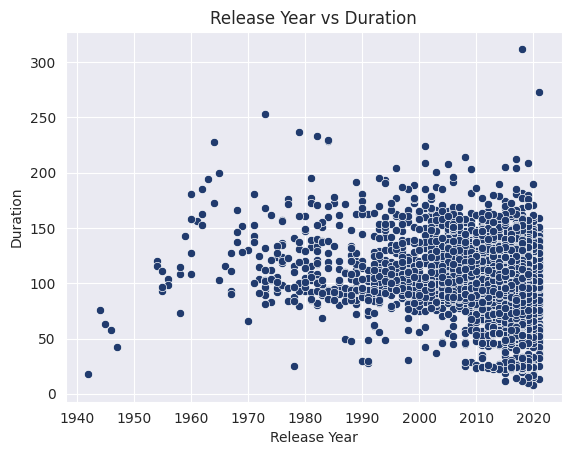

In [37]:
sns.scatterplot(x='release_year', y='duration_mins', data=movies_df)
sns.set_palette('rocket')
plt.xlabel("Release Year")
plt.ylabel("Duration")
plt.title("Release Year vs Duration")
plt.show()

##Correlation Heatmap

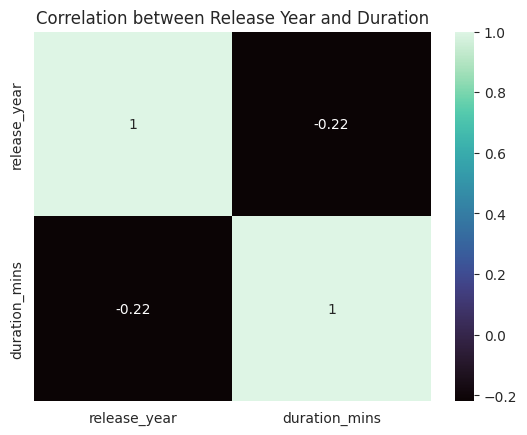

In [38]:
numeric=movies_df[['release_year','duration_mins']]
corr=numeric.corr()
sns.heatmap(corr,annot=True,cmap='mako')
plt.title('Correlation between Release Year and Duration')
plt.show()